In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys
import warnings

from dycoreutils import calendar_utils as cal
from dycoreutils import plot_utils as dycoreplt
from dycoreutils import filter_utils as filt
from dycoreutils import colorbar_utils as cbar

importlib.reload(cal)
importlib.reload(dycoreplt)

<module 'dycoreutils.plot_utils' from '/home/islas/python/dycorediags/dycoreutils/plot_utils.py'>

In [2]:
# deseasonalize function
def deseasonalize(data):
    datseas = data.groupby('time.dayofyear').mean('time')
    dat4harm = filt.calc_season_nharm(datseas, 4, dimtime=0)
    datdeseas = data.groupby('time.dayofyear') - dat4harm
    return(datdeseas)

In [3]:
expname=['L70_bugfix', 'defaultsponge','sponge5','sponge5_marshian','sponge5-marshian_top-taper']
basepath="/project/cas/islas/python_savs/dycorediags/preprocessing/TEMdiags/"
plotpath="/web/web-data/staff/islas/verticalres/"

In [4]:
# setting up plot locations
x1, x2, y1, y2 = dycoreplt.get4by4coords()

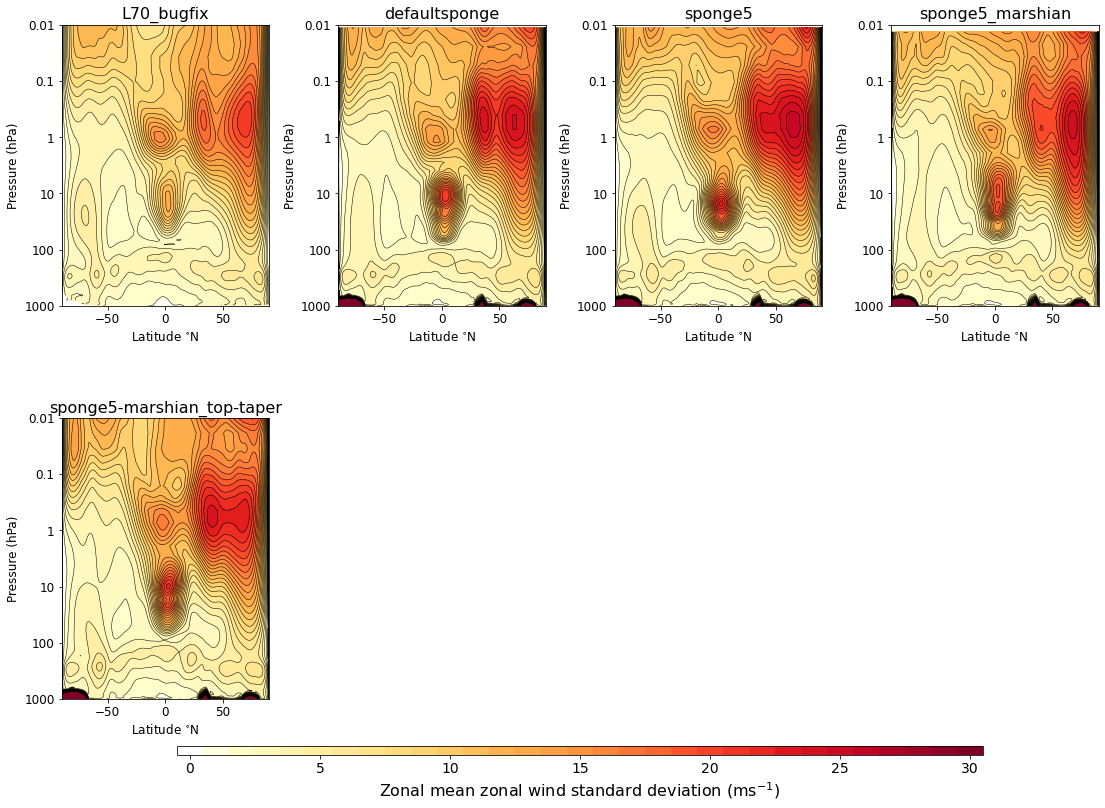

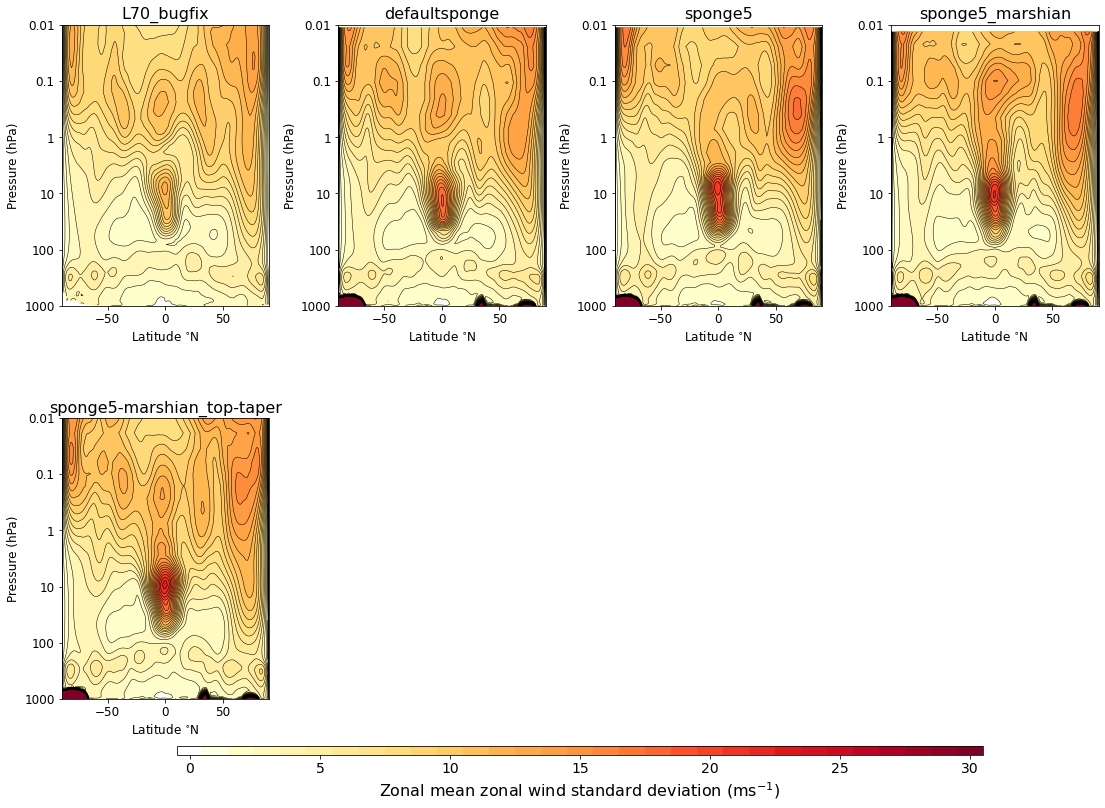

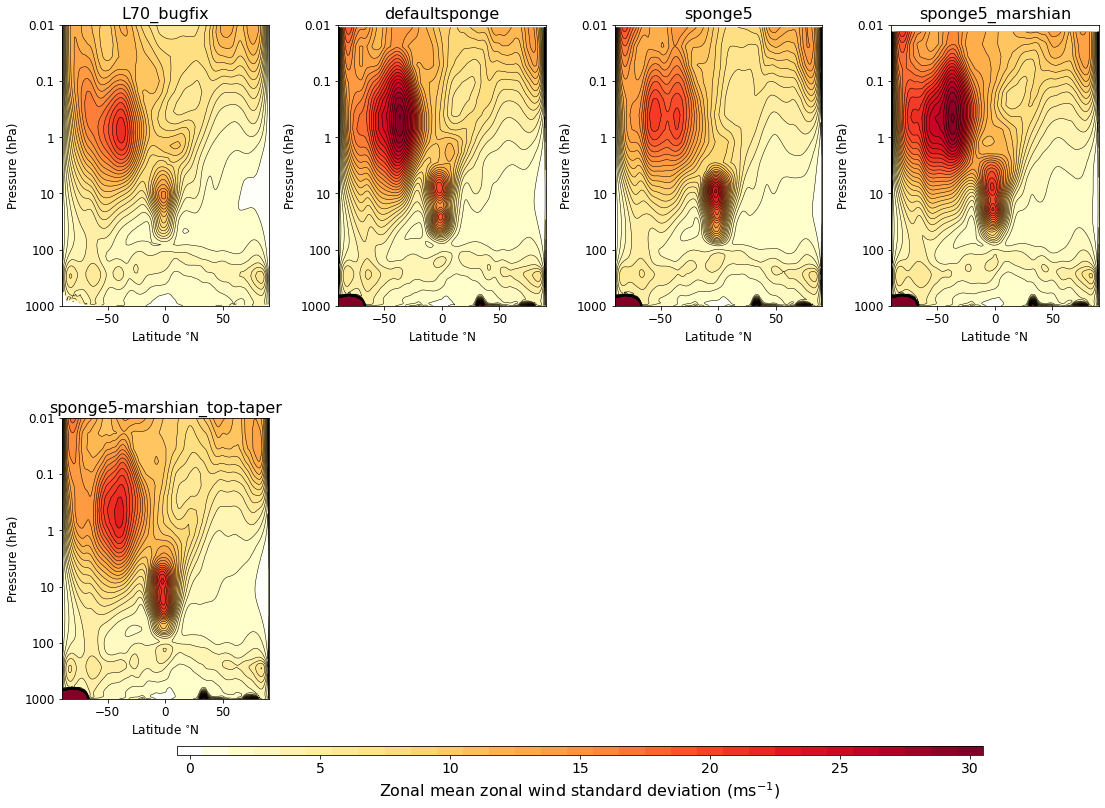

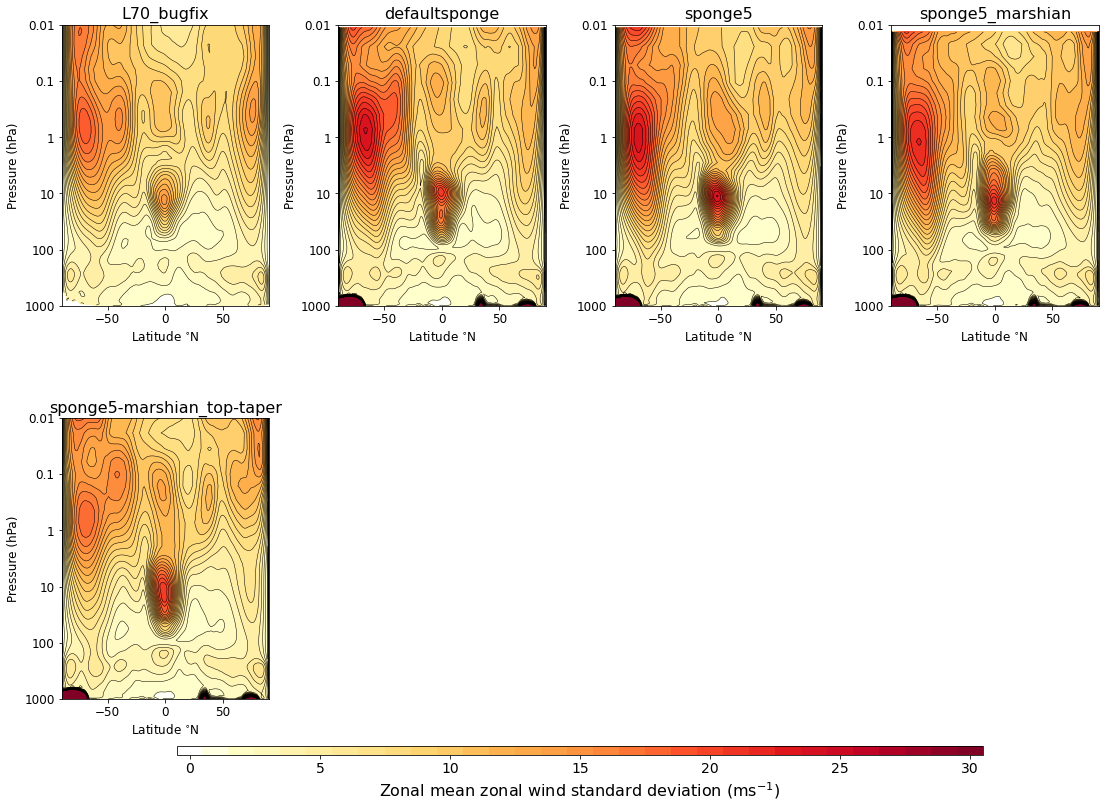

In [5]:
fig_djf = plt.figure(figsize=(16,26)) 
fig_mam = plt.figure(figsize=(16,26))
fig_jja = plt.figure(figsize=(16,26))
fig_son = plt.figure(figsize=(16,26))

countplot=0
for iexp in expname:
    fpath=basepath+iexp+".nc"
    dat = xr.open_dataset(fpath, decode_times=True)
    datdeseas = deseasonalize(dat.uzm)
    
    djfplot = datdeseas.where(datdeseas['time.season'] == 'DJF').std(dim='time')
    mamplot = datdeseas.where(datdeseas['time.season'] == 'MAM').std(dim='time')
    jjaplot = datdeseas.where(datdeseas['time.season'] == 'JJA').std(dim='time')
    sonplot = datdeseas.where(datdeseas['time.season'] == 'SON').std(dim='time')
    
    ax_djf = dycoreplt.plotlatlogpre_to0p01(fig_djf, djfplot, djfplot.lat, djfplot.pre, 1,-30,30,iexp,
                                            x1[countplot],x2[countplot],y1[countplot],y2[countplot])
    ax_mam = dycoreplt.plotlatlogpre_to0p01(fig_mam, mamplot, mamplot.lat, mamplot.pre, 1,-30,30,iexp,
                                            x1[countplot],x2[countplot],y1[countplot],y2[countplot])
    ax_jja = dycoreplt.plotlatlogpre_to0p01(fig_jja, jjaplot, jjaplot.lat, jjaplot.pre, 1,-30,30,iexp,
                                            x1[countplot],x2[countplot],y1[countplot],y2[countplot])
    ax_son = dycoreplt.plotlatlogpre_to0p01(fig_son, sonplot, sonplot.lat, sonplot.pre, 1,-30,30,iexp,
                                            x1[countplot],x2[countplot],y1[countplot],y2[countplot])
    
    countplot=countplot+1
    
ax_djf = cbar.plotcolorbar(fig_djf, 1, -30, 30,'Zonal mean zonal wind standard deviation (ms$^{-1}$)',x1[0]+0.1,x2[3]-0.1,y1[countplot-1]-0.03,y1[countplot-1]-0.025, posneg='pos')
ax_mam = cbar.plotcolorbar(fig_mam, 1, -30, 30,'Zonal mean zonal wind standard deviation (ms$^{-1}$)',x1[0]+0.1,x2[3]-0.1,y1[countplot-1]-0.03,y1[countplot-1]-0.025, posneg='pos')
ax_jja = cbar.plotcolorbar(fig_jja, 1, -30, 30,'Zonal mean zonal wind standard deviation (ms$^{-1}$)',x1[0]+0.1,x2[3]-0.1,y1[countplot-1]-0.03,y1[countplot-1]-0.025, posneg='pos')
ax_son = cbar.plotcolorbar(fig_son, 1, -30, 30,'Zonal mean zonal wind standard deviation (ms$^{-1}$)',x1[0]+0.1,x2[3]-0.1,y1[countplot-1]-0.03,y1[countplot-1]-0.025, posneg='pos')

fig_djf.savefig(plotpath+'ustdev_djf.pdf', facecolor='white', bbox_inches='tight')
fig_mam.savefig(plotpath+'ustdev_mam.pdf', facecolor='white', bbox_inches='tight')
fig_jja.savefig(plotpath+'ustdev_jja.pdf', facecolor='white', bbox_inches='tight')
fig_son.savefig(plotpath+'ustdev_son.pdf', facecolor='white', bbox_inches='tight')